In [1]:
import myimagelib as mylib
import mymodel
from PIL import Image
import matplotlib.pyplot as plt

CURRENT IMAGE:


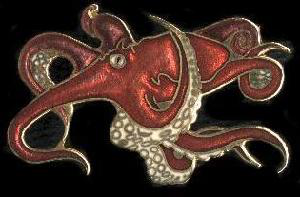

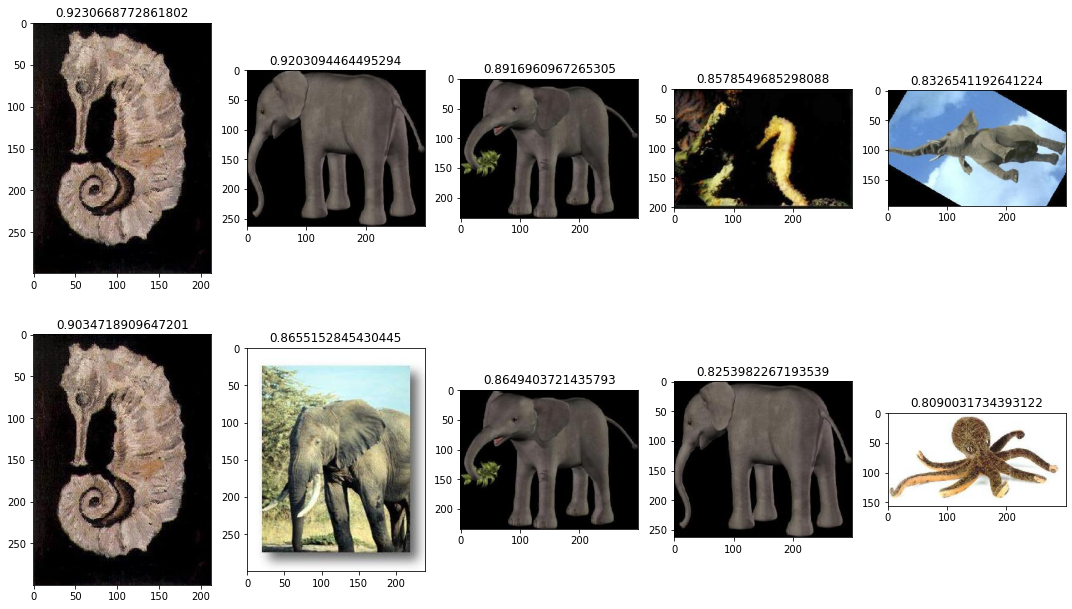

In [2]:
currimg = 'assets/octopus/image_0030.jpg'
print('CURRENT IMAGE:')
im = Image.open(currimg)
display(im)
similar = mymodel.retrieve_similar_images(currimg, limit=5)
cols = len(similar['hue'])
fig, axs = plt.subplots(2, cols)
for ax, img in zip(axs[0][:cols], similar['rgb']):
    im = Image.open(img['path'])
    ax.imshow(im, vmin=0, vmax=255)
    ax.set_title("{}".format(img['rgb']))

for ax, img in zip(axs[1][:cols], similar['hue']):
    im = Image.open(img['path'])
    ax.imshow(im, vmin=0, vmax=255)
    ax.set_title("{}".format(img['hue']))


fig.set_size_inches(18.5, 10.5)
plt.show()

In [3]:
print("category: (rgb accuracy, hue accuracy)")
total = []
categories = ['elephant', 'flamingo', 'kangaroo', 'leopards', 'octopus', 'seahorse']
for cat in categories:
    curr = mymodel.get_accuracy_category(cat)
    total.append(curr)
    print("{}: {}".format(cat,curr))

# sum all categories success rates and divide it by the number of categories to get the general accuracy
curr = (sum(x for x,_ in total) / len(categories), sum(y for _,y in total) / len(categories))
print("General: {}".format(tuple([round(x, 5) for x in curr])))

category: (rgb accuracy, hue accuracy)
elephant: (0.7, 0.6)
flamingo: (0.3, 0.7)
kangaroo: (0.8, 0.7)
leopards: (1.0, 0.8)
octopus: (0.7, 0.5)
seahorse: (0.2, 0.7)
General: (0.61667, 0.66667)
